In [1]:
#test avec prophet

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [169]:
uber = pd.read_csv('../uber_data.csv', parse_dates = ['pickup_dt'])

In [170]:
man = uber[uber['borough'] == 'Manhattan']

In [171]:
man = man[man['pickup_dt'] < '2015-03-01 00:00:00']

In [172]:
man = man[['pickup_dt', 'pickups']]

In [173]:
man.columns = ['ds', 'y']

In [174]:
man.tail()

,ds,y
9357,2015-02-28 19:00:00,4929
9364,2015-02-28 20:00:00,5234
9371,2015-02-28 21:00:00,4614
9378,2015-02-28 22:00:00,4760
9385,2015-02-28 23:00:00,5359


In [205]:
model = Prophet()
model.add_seasonality(
    name='weekly', period=7, fourier_order=50, prior_scale=0.1)
model.add_seasonality(
    name='daily', period=1, fourier_order=20, prior_scale=0.1)
model.fit(man)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [206]:
future = model.make_future_dataframe(periods = 5)
future.tail()

,ds
1415,2015-03-01 23:00:00
1416,2015-03-02 23:00:00
1417,2015-03-03 23:00:00
1418,2015-03-04 23:00:00
1419,2015-03-05 23:00:00


In [207]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1415,2015-03-01 23:00:00,2336.062492,1652.747755,3020.730268
1416,2015-03-02 23:00:00,1962.832582,1301.533004,2690.067371
1417,2015-03-03 23:00:00,2606.874755,1908.983488,3268.989290
1418,2015-03-04 23:00:00,2933.487944,2257.812092,3650.294237
1419,2015-03-05 23:00:00,3924.351860,3209.891384,4597.052288


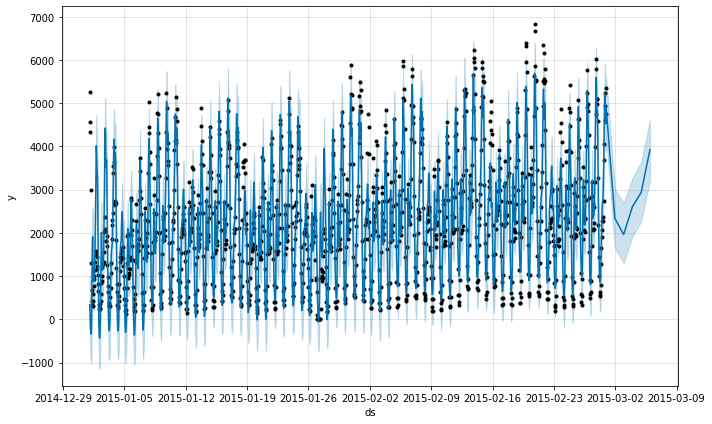

In [208]:
fig = model.plot(forecast)

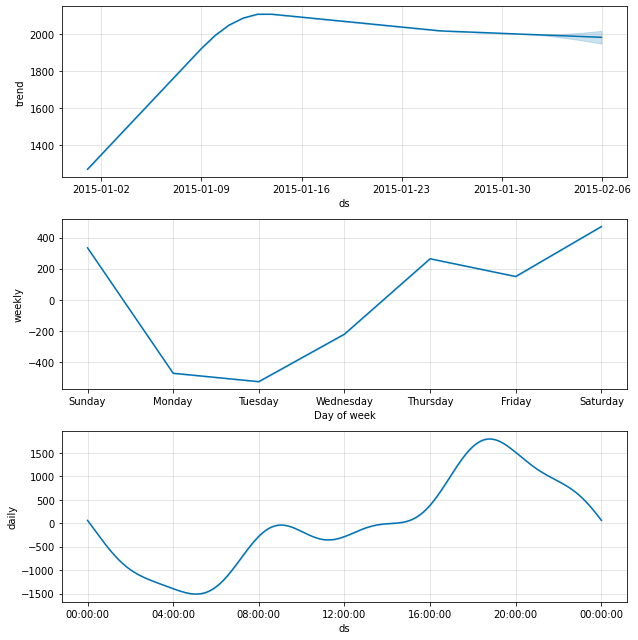

In [159]:
fig = model.plot_components(forecast)